In [133]:
#https://stackoverflow.com/questions/35842274/convert-own-image-to-mnists-image

from PIL import Image, ImageFilter
import numpy as np


def imageprepare(argv):
    """
    This function returns a 28x28 pixel value matrix
    The input is an file location.
    """
    im = Image.open(argv).convert('L') #convert to gray scale
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 28 pixels.
        nheight = int(round((28.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((28, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (0, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((28.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical position
        newImage.paste(img, (wleft, 0))  # paste resized image on white canvas

    x = list(newImage.getdata())  # get pixel values
    x = np.asarray(x) #convert to an array
    x = np.reshape(x,(1,28,28,1))
    x = x.astype('float32')/255
    
    return x

In [134]:
x=imageprepare('../images/A.jpg')

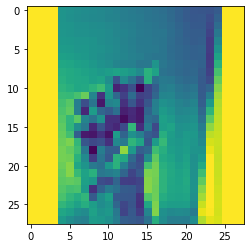

In [135]:
import matplotlib.pyplot as plt
in_img = x[0].reshape(28,28)
plt.imshow(in_img)

In [28]:
from tensorflow import keras
model = keras.models.load_model('../models')

In [66]:
import numpy as np
x = np.asarray(x)

In [36]:
type(x)

numpy.ndarray

In [67]:
x = np.reshape(x,(1,28,28,1))
x.shape

(1, 28, 28, 1)

In [68]:
x = x.astype('float32')/255

In [69]:
x.shape

(1, 28, 28, 1)

In [126]:
prediction = model.predict(x)

In [127]:
prediction

array([[1.1286414e-04, 3.9808164e-04, 3.5031184e-04, 8.7958902e-01,
        5.0610695e-03, 4.7193137e-03, 2.4848816e-03, 5.3848475e-03,
        2.2436684e-04, 1.7790133e-07, 1.0279265e-02, 9.3526449e-03,
        8.9151717e-06, 3.2675409e-05, 1.0367659e-02, 5.6869838e-02,
        3.0758241e-03, 8.7793422e-04, 3.0867527e-03, 6.9895131e-03,
        3.9144041e-04, 2.8071663e-05, 1.4900319e-05, 2.1811931e-04,
        8.1511760e-05]], dtype=float32)

In [128]:
alphabet = np.argmax(prediction)

In [129]:
alphabet

3

In [137]:
import string
label_dic = {i:string.ascii_uppercase[i] for i in range(26)}
label_dic.pop(9)
label_dic.pop(25)

'Z'

In [139]:
label_dic[alphabet]

'D'